In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Random forest <du>
    based on: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial/notebook

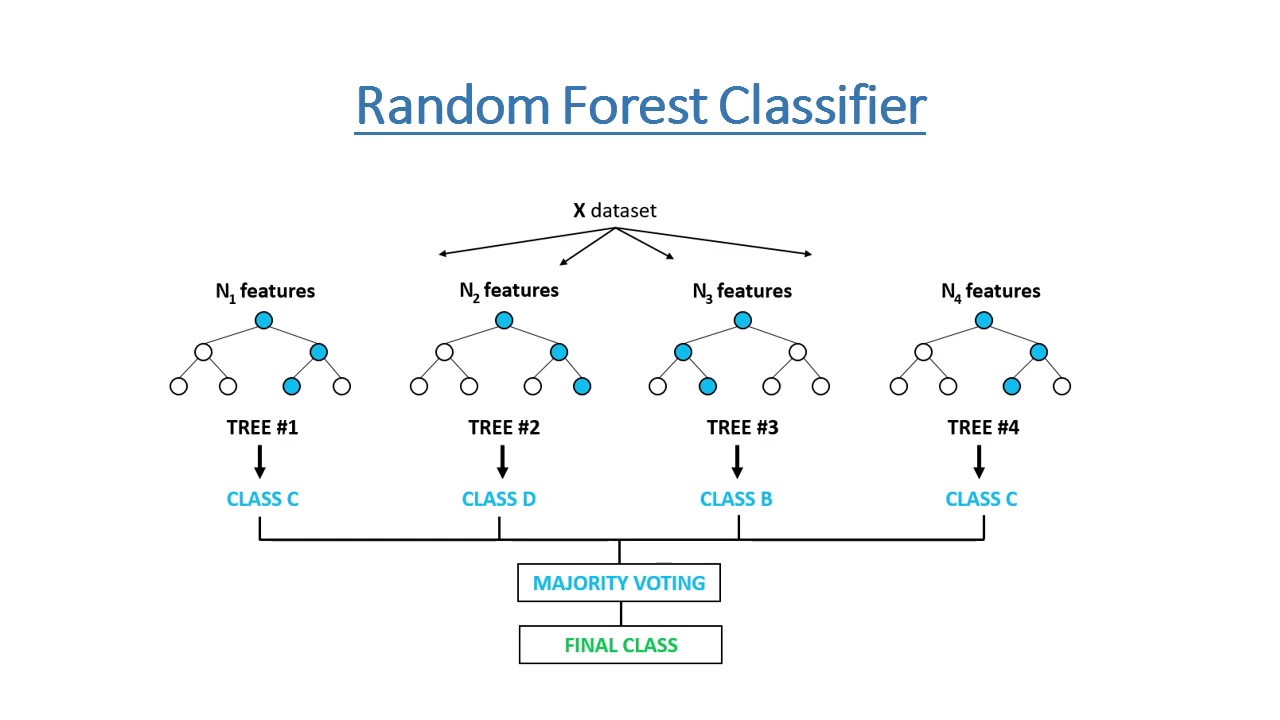

## Import dataset

In [9]:
df = pd.read_csv('training_greece/traindataset_new_norm.csv')

In [10]:
# let's preview the dataset

df.head()

,dom_dir,dom_vel,res_max,dir_max,max_dew_temp,min_dew_temp,mean_dew_temp,max_temp,min_temp,mean_temp,...,corine_gr4,corine_gr5,corine_gr21,corine_gr22,corine_gr23,corine_gr24,corine_gr31,corine_gr32,corine_gr33,band
0,7.0,0.204624,0.204624,7.0,0.864167,0.894995,0.871111,0.657774,0.809303,0.725191,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,1
1,1.0,0.290178,0.334589,8.0,0.724772,0.715282,0.711709,0.733665,0.826646,0.771734,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.767747,0.232253,0.0,1
2,7.0,0.156911,0.203335,6.0,0.735098,0.645204,0.675300,0.838963,0.783259,0.832360,...,0.0,0.0,0.341097,0.0,0.0,0.000000,0.000000,0.658903,0.0,1
3,2.0,0.067056,0.088193,7.0,0.832189,0.801324,0.798462,0.721694,0.724952,0.741619,...,0.0,0.0,0.000000,0.0,0.0,0.051634,0.000000,0.948366,0.0,1
4,7.0,0.178353,0.198610,6.0,0.786913,0.675019,0.696542,0.852739,0.782734,0.837116,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,1


In [11]:
df.columns

Index(['dom_dir', 'dom_vel', 'res_max', 'dir_max', 'max_dew_temp',
       'min_dew_temp', 'mean_dew_temp', 'max_temp', 'min_temp', 'mean_temp',
       'rain_7_days', 'ndvi', 'evi', 'lst_day', 'lst_night', 'fire', 'weekday',
       'month', 'x', 'y', 'firedate', 'pop', 'slope', 'road_dens', 'dem',
       'aspect', 'f81', 'frequency', 'corine_13', 'corine_4', 'corine_30',
       'corine_38', 'corine_36', 'corine_10', 'corine_20', 'corine_18',
       'corine_16', 'corine_43', 'corine_27', 'corine_5', 'corine_31',
       'corine_17', 'corine_12', 'corine_26', 'corine_37', 'corine_24',
       'corine_28', 'corine_29', 'corine_19', 'corine_21', 'corine_6',
       'corine_23', 'corine_22', 'corine_1', 'corine_8', 'corine_33',
       'corine_2', 'corine_40', 'corine_32', 'corine_41', 'corine_3',
       'corine_25', 'corine_35', 'corine_14', 'corine_42', 'corine_11',
       'corine_44', 'corine_15', 'corine_7', 'corine_9', 'corine_gr1',
       'corine_gr4', 'corine_gr5', 'corine_gr21', 'corine_

In [12]:
#view summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26604 entries, 0 to 26603
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dom_dir        26604 non-null  float64
 1   dom_vel        26604 non-null  float64
 2   res_max        26604 non-null  float64
 3   dir_max        26604 non-null  float64
 4   max_dew_temp   26604 non-null  float64
 5   min_dew_temp   26604 non-null  float64
 6   mean_dew_temp  26604 non-null  float64
 7   max_temp       26604 non-null  float64
 8   min_temp       26604 non-null  float64
 9   mean_temp      26604 non-null  float64
 10  rain_7_days    26604 non-null  float64
 11  ndvi           26604 non-null  float64
 12  evi            26604 non-null  float64
 13  lst_day        26604 non-null  float64
 14  lst_night      26604 non-null  float64
 15  fire           26604 non-null  float64
 16  weekday        26604 non-null  float64
 17  month          26604 non-null  float64
 18  x     

## Explore the fire class

In [13]:
df['fire'].value_counts()

1.0    13957
0.0    12647
Name: fire, dtype: int64

## Missing values in variables

In [14]:
df.isnull().sum()

dom_dir         0
dom_vel         0
res_max         0
dir_max         0
max_dew_temp    0
               ..
corine_gr24     0
corine_gr31     0
corine_gr32     0
corine_gr33     0
band            0
Length: 81, dtype: int64

## Feature Engineering <du>
    
    Some of the features: dom_dir, dir_max, weekday and month are categorical and need a modification named one hot encoding

In [ ]:
df = df[['dom_dir', 'dom_vel', 'res_max', 'dir_max', 'max_dew_temp',
       'min_dew_temp', 'mean_dew_temp', 'max_temp', 'min_temp', 'mean_temp',
       'rain_7_days', 'ndvi', 'evi', 'lst_day', 'lst_night', 'weekday',
       'month', 'x', 'y', 'firedate', 'pop', 'slope', 'road_dens', 'dem',
       'aspect', 'f81', 'frequency','corine_gr5', 'corine_gr21', 'corine_gr22', 'corine_gr23',
       'corine_gr24', 'corine_gr31', 'corine_gr32', 'corine_gr33']]

In [38]:
cat_vars = {'dom_dir': [1, 2, 3, 4, 5, 6, 7, 8],
                'dir_max': [1, 2, 3, 4, 5, 6, 7, 8],
                'weekday': [1, 2, 3, 4, 5, 6, 7],
                'month': [3, 4, 5, 6, 7, 8, 9, 10]}
for key, value in cat_vars.items():
    categorical_variable = key
    df[categorical_variable] = df[categorical_variable].astype('int')
    y = pd.get_dummies(df[categorical_variable], prefix=categorical_variable)
    df = df.drop(categorical_variable, axis=1)
    df = df.join(y)

## Select columns for feature vectors and declare feature vector and target variable

In [40]:
df.columns

Index(['dom_vel', 'res_max', 'max_dew_temp', 'min_dew_temp', 'mean_dew_temp',
       'max_temp', 'min_temp', 'mean_temp', 'rain_7_days', 'ndvi',
       ...
       'weekday_6', 'weekday_7', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10'],
      dtype='object', length=109)

In [43]:
X = df.drop(['fire'],axis=1)
y = df['fire']

## Split data into separate training and test set 

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [45]:
X_train.shape, X_test.shape

((17824, 108), (8780, 108))

# Random Forest Classifier model with default parameters ¶

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(random_state=0)

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
y_pred = rfc.predict(X_test)

In [50]:
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

In [57]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model recall score with 10 decision-trees : {0:0.4f}'. format(recall_score(y_test, y_pred)))
print('Model recall of non fires with 10 decision-trees : {0:0.4f}'. format(recall_score(y_test, y_pred,pos_label=0)))
print('Model f1 score with 10 decision-trees : {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9623
Model recall score with 10 decision-trees : 0.9609
Model recall of non fires with 10 decision-trees : 0.9639
Model f1 score with 10 decision-trees : 0.9643


# Random forest  with 100 trees

In [58]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

In [60]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))
print('Model recall score with 100 decision-trees : {0:0.4f}'. format(recall_score(y_test, y_pred_100)))
print('Model recall of non fires with 100 decision-trees : {0:0.4f}'. format(recall_score(y_test, y_pred_100,pos_label=0)))
print('Model f1 score with 100 decision-trees : {0:0.4f}'. format(f1_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9623
Model recall score with 100 decision-trees : 0.9609
Model recall of non fires with 100 decision-trees : 0.9639
Model f1 score with 100 decision-trees : 0.9643


# Feature importances

In [61]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [62]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

res_max        0.071211
mean_temp      0.067611
dom_vel        0.066938
min_temp       0.053698
rain_7_days    0.047121
                 ...   
corine_38      0.000000
corine_5       0.000000
corine_22      0.000000
band           0.000000
corine_43      0.000000
Length: 108, dtype: float64

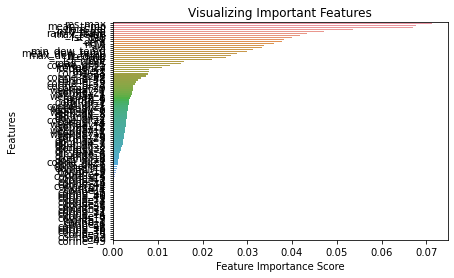

In [63]:


# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

